In [25]:
# In order to be able to pull data using API without error,
    #Add "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10" in terminal to open Jupyter notebook with the
        #rate limit of 10

# The code in this cell is provided by the CoinMarketCap API documentations

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import os
from dotenv import load_dotenv

load_dotenv() #load environment variables from .envfile

API_KEY = os.getenv('API_KEY')
url = 'https://pro-api.coinmarketcap.com./v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'50', 
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': API_KEY,
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

In [26]:
type(data)

dict

In [27]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [28]:
df = pd.json_normalize(data['data'])
df['timestamp']= pd.to_datetime('now')
df.head()

C:\Users\samue\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10099,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19324137.00000,19324137.00000,NaN,1,NaN,NaN,NaN,2023-03-21T22:22:00.000Z,28042.34797,36430217121.04440,-19.40200,0.08734,0.18588,13.67679,14.27587,24.31505,67.00542,541894173904.92407,45.95780,588889307294.98999,NaN,2023-03-21T22:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-21 22:24:44.952766
1,1027,Ethereum,ETH,ethereum,6597,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,NaN,2023-03-21T22:22:00.000Z,1793.08595,10933045060.78497,-0.50260,-0.03527,2.30914,4.98643,6.24781,8.56487,47.98589,219426859992.13828,18.60980,219426859992.14001,NaN,2023-03-21T22:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-21 22:24:44.952766
2,825,Tether,USDT,tether,49827,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,76856420219.05283,80091735571.99397,NaN,3,NaN,NaN,NaN,2023-03-21T22:22:00.000Z,1.00050,50297868494.21455,-7.94000,0.02228,-0.13052,-0.30930,0.02352,0.02829,0.04271,76895040505.34479,6.52150,80131981601.52000,NaN,2023-03-21T22:22:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-21 22:24:44.952766
3,1839,BNB,BNB,bnb,1218,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,157890691.40818,159979963.59043,NaN,4,NaN,NaN,NaN,2023-03-21T22:22:00.000Z,336.50643,635350597.29494,-6.94410,-0.06547,-0.05357,9.01936,7.28358,10.86612,36.29347,53131232978.51057,4.50610,53834286502.95000,NaN,2023-03-21T22:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-21 22:24:44.952766
4,3408,USD Coin,USDC,usd-coin,11054,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,35289631770.06458,35289631770.06458,NaN,5,NaN,NaN,NaN,2023-03-21T22:22:00.000Z,0.99759,5154003676.58090,-23.59160,0.03340,-0.04623,-0.18202,-0.25194,-0.29175,-0.24134,35204555050.65886,2.98640,35204555050.66000,NaN,2023-03-21T22:22:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-21 22:24:44.952766


# Below is the function to run the API code

In [29]:
def api_runner():
    global df
    API_KEY = os.getenv('API_KEY')
    url = 'https://pro-api.coinmarketcap.com./v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'50', 
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': API_KEY,
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      #print(e)
    
    # If the data is only kept in a DataFrame, the code here is used. I opted to save it in a CSV in my computer
    # df2 = pd.json_normalize(data['data'])
    # df2['Timestamp'] = pd.to_datetime('now')
    # df = df.append(df2)
    
        df = pd.json_normalize(data['data'])
        df['timestamp']= pd.to_datetime('now')
        df

    if not os.path.isfile(r'C:\Users\samue\OneDrive\Documents\GitHub\Learning-Projects\Crypto data API\API_DATA.csv'):
        df.to_csv(r'C:\Users\samue\OneDrive\Documents\GitHub\Learning-Projects\Crypto data API\API_DATA.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\samue\OneDrive\Documents\GitHub\Learning-Projects\Crypto data API\API_DATA.csv', mode= 'a', header= False)

In [30]:
from time import time
from time import sleep

In [31]:
# The api can only be run 333 times as restricted by CoinMarketCap
for i in range(333):
    api_runner()
    print("API run successfully")
    sleep(60) #API runner will sleep for 60 seconds before running again
exit()

API run successfully
API run successfully


KeyboardInterrupt: 

In [32]:
df1 = pd.read_csv(r'C:\Users\samue\OneDrive\Documents\GitHub\Learning-Projects\Crypto data API\API_DATA.csv')

In [33]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [34]:
df1.head()

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10099,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19324043.00000,19324043.00000,NaN,1,NaN,NaN,NaN,2023-03-21T21:28:00.000Z,27990.51671,36468438958.07639,-20.06150,-0.45043,-0.49831,14.61832,14.02288,25.71230,66.64051,540889948437.80737,45.96420,587800850846.47998,NaN,2023-03-21T21:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-21 21:31:00.757898
1,1,1027,Ethereum,ETH,ethereum,6597,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,NaN,2023-03-21T21:28:00.000Z,1792.88204,10938835939.95141,-1.68700,0.08782,1.88736,6.15449,6.40702,9.37803,47.98753,219401906431.01251,18.64340,219401906431.01001,NaN,2023-03-21T21:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-21 21:31:00.757898
2,2,825,Tether,USDT,tether,49826,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,76856420219.05283,80091735571.99397,NaN,3,NaN,NaN,NaN,2023-03-21T21:28:00.000Z,1.00025,50231204175.61670,-8.69590,-0.00099,-0.13188,-0.23921,0.00134,0.00525,0.01920,76875649334.78589,6.53240,80111774148.45000,NaN,2023-03-21T21:28:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-21 21:31:00.757898
3,3,1839,BNB,BNB,bnb,1218,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,157890705.12470,159979963.59043,NaN,4,NaN,NaN,NaN,2023-03-21T21:28:00.000Z,336.72736,641740946.92646,-4.85440,-0.33696,0.40760,9.48338,7.81810,11.69635,36.34971,53166119571.66254,4.51770,53869630049.48000,NaN,2023-03-21T21:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-21 21:31:00.757898
4,4,3408,USD Coin,USDC,usd-coin,11051,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,35289490658.01458,35289490658.01458,NaN,5,NaN,NaN,NaN,2023-03-21T21:28:00.000Z,0.99730,5209730230.19625,-22.05580,0.03294,-0.08059,-0.13396,-0.26782,-0.31248,-0.27452,35194034078.09309,2.99120,35194034078.09000,NaN,2023-03-21T21:28:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-21 21:31:00.757898


In [35]:
df1.columns

Index(['Unnamed: 0', 'id', 'name', 'symbol', 'slug', 'num_market_pairs',
       'date_added', 'tags', 'max_supply', 'circulating_supply',
       'total_supply', 'platform', 'cmc_rank',
       'self_reported_circulating_supply', 'self_reported_market_cap',
       'tvl_ratio', 'last_updated', 'quote.USD.price', 'quote.USD.volume_24h',
       'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d', 'quote.USD.market_cap',
       'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap',
       'quote.USD.tvl', 'quote.USD.last_updated', 'platform.id',
       'platform.name', 'platform.symbol', 'platform.slug',
       'platform.token_address', 'timestamp'],
      dtype='object')

Below I will be grouping by the different coins and calculating their average percent change for a given interval 

In [36]:
df2 = df1.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h'
                                          , 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d'
                                          , 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df2.head()

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.12510,-0.04818,14.15740,14.19689,25.40491,66.94402
Ethereum,-0.03913,2.14443,5.57493,6.34081,9.28083,48.03265
Tether,0.00778,-0.13890,-0.26610,0.01592,0.02237,0.03579
BNB,-0.21125,0.45567,9.31520,7.59258,11.36946,36.39986
USD Coin,0.02688,-0.06964,-0.14588,-0.25677,-0.29030,-0.25459


In [37]:
df3 = df2.stack()
df3 = df3.to_frame(name = 'values')
df3.head()

values
name                                         
Bitcoin quote.USD.percent_change_1h  -0.12510
        quote.USD.percent_change_24h -0.04818
        quote.USD.percent_change_7d  14.15740
        quote.USD.percent_change_30d 14.19689
        quote.USD.percent_change_60d 25.40491

In [38]:
type(df3)

pandas.core.frame.DataFrame

In [39]:
index = pd.Index(range(int(df3.count())))
#df4 = df3.set_index(index)  --> ran this code first and then comment it out and reset the index in the dataframe
df4 = df3.reset_index()

In [40]:
df4.head()

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.12510
1,Bitcoin,quote.USD.percent_change_24h,-0.04818
2,Bitcoin,quote.USD.percent_change_7d,14.15740
3,Bitcoin,quote.USD.percent_change_30d,14.19689
4,Bitcoin,quote.USD.percent_change_60d,25.40491


In [41]:
# Rename the columns name from level_1 to percent_change
df4 = df4.rename(columns ={'level_1': 'percent_change'})
df4.head()

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.12510
1,Bitcoin,quote.USD.percent_change_24h,-0.04818
2,Bitcoin,quote.USD.percent_change_7d,14.15740
3,Bitcoin,quote.USD.percent_change_30d,14.19689
4,Bitcoin,quote.USD.percent_change_60d,25.40491


In [42]:
## Since the names of the catagories of percent change in the grouped dataframe are long,
    ##I change it to shorter names which will help with the visualizations below
df4['percent_change'] = df4['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h'
                                          , 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d'
                                          , 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']
                                   , ['1h', '24h', '7d', '30d', '60d', '90d'])
df4.head()

,name,percent_change,values
0,Bitcoin,1h,-0.12510
1,Bitcoin,24h,-0.04818
2,Bitcoin,7d,14.15740
3,Bitcoin,30d,14.19689
4,Bitcoin,60d,25.40491


## Some Visualization

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

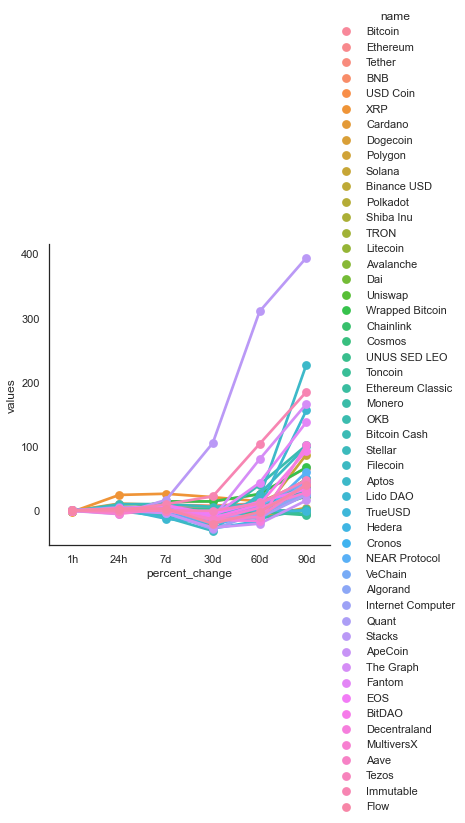

In [44]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df4, kind = 'point')

In [45]:
# Creating plots with specific columns

df5 = df1[['name','quote.USD.price','timestamp']]
df5 = df5.query(" name == ['Bitcoin'] ")
df5.head()

,name,quote.USD.price,timestamp
0,Bitcoin,27990.51671,2023-03-21 21:31:00.757898
50,Bitcoin,27990.51671,2023-03-21 21:31:00.757898
100,Bitcoin,27990.51671,2023-03-21 21:31:00.757898
150,Bitcoin,28045.76122,2023-03-21 21:50:32.277719
200,Bitcoin,28062.67268,2023-03-21 21:51:32.614521


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

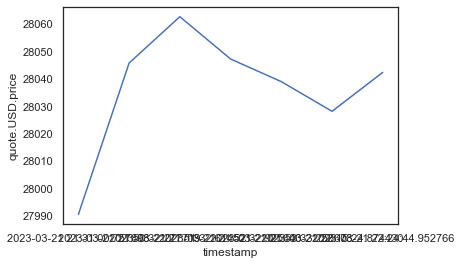

In [46]:
sns.set_theme(style="white")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df5)